@author: eveomett

# Lab 3: MAUP and data.  See details on Canvas page

## Make sure to say where/when you got your data!

In [1]:
import pandas as pd
import geopandas as gpd
import maup
from maup import smart_repair
import time
import os

maup.progress.enabled = True

In [2]:
import warnings
warnings.filterwarnings('ignore')

[Population data](https://redistrictingdatahub.org/dataset/minnesota-block-pl-94171-2020-by-table/): from 2020 Census Redistricting Data (P.L. 94-171) Shapefiles

[2020 County Data](https://redistrictingdatahub.org/dataset/minnesota-county-pl-94171-2020/): from 2020 Census Redistricting Data (P.L. 94-171) Shapefiles

[2022 State Senate District Data](https://redistrictingdatahub.org/dataset/2022-minnesota-state-senate-districts-approved-plan/): 2022 State Senate Approved Plan

[2020 Election Data](https://redistrictingdatahub.org/dataset/vest-2020-minnesota-precinct-and-election-results/): VEST 2020 Minnesota precinct and election results

[2018 Election Data](https://redistrictingdatahub.org/dataset/vest-2018-minnesota-precinct-and-election-results/): VEST 2018 Minnesota precinct and election results

# Citations

Followed SC_MAUP.ipynb in-class notebook

Gerry chain at the end from my own Lab 3 notebook

In [3]:
# population

start_time = time.time()
population_df = gpd.read_file("./mn_pl2020_b-2/mn_pl2020_p2_b.shp")
end_time = time.time()
print("The time to import mn_pl2020_p2_b.shp is:",
      (end_time-start_time)/60, "mins")

The time to import mn_pl2020_p2_b.shp is: 0.6402162313461304 mins


In [4]:
# VAP

start_time = time.time()
vap_df= gpd.read_file("./mn_pl2020_b-2/mn_pl2020_p4_b.shp")
end_time = time.time()
print("The time to import mn_pl2020_p4_b.shp is:",
      (end_time-start_time)/60, "mins")

The time to import mn_pl2020_p4_b.shp is: 0.6843487819035848 mins


In [5]:
# Vest 2020

start_time = time.time()
vest20_df = gpd.read_file("./mn_vest_20/mn_vest_20.shp")
end_time = time.time()
print("The time to import mn_vest_20.shp is:",
      (end_time-start_time)/60, "mins")

The time to import mn_vest_20.shp is: 0.009027584393819173 mins


In [6]:
# County

start_time = time.time()
county_df = gpd.read_file("./mn_pl2020_cnty/mn_pl2020_cnty.shp")
end_time = time.time()
print("The time to import mn_pl2020_cnty.shp is:",
      (end_time-start_time)/60, "mins")

The time to import mn_pl2020_cnty.shp is: 0.0021045366923014325 mins


In [7]:
# Sen

start_time = time.time()
sen_df = gpd.read_file("./mn_sldu_adopted_2022/l2022-sen-shp.shp")
end_time = time.time()
print("The time to import state senate districts is:",
      (end_time-start_time)/60, "mins")

The time to import state senate districts is: 0.0019797484079996743 mins


In [8]:
sen_df.shape

(67, 52)

In [9]:
print(population_df.columns)
print(vap_df.columns)
print(vest20_df.columns)
print(county_df.columns)
print(sen_df.columns)

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0020001',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0020012', 'P0020013',
       'P0020014', 'P0020015', 'P0020016', 'P0020017', 'P0020018', 'P0020019',
       'P0020020', 'P0020021', 'P0020022', 'P0020023', 'P0020024', 'P0020025',
       'P0020026', 'P0020027', 'P0020028', 'P0020029', 'P0020030', 'P0020031',
       'P0020032', 'P0020033', 'P0020034', 'P0020035', 'P0020036', 'P0020037',
       'P0020038', 'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043',
       'P0020044', 'P0020045', 'P0020046', 'P0020047', 'P0020048', 'P0020049',
       'P0020050', 'P0020051', 'P0020052', 'P0020053', 'P0020054', 'P0020055',
       'P0020056', 'P0020057', 'P0020058', 'P0020059', 'P0020060', 'P0020061',
       'P0020062', 'P0020063', 'P0020064', 'P0020065', 'P0020066', 'P0020067',
       'P0020068', 'P0020069', 'P0020070', 'P0020071', 'P002

In [10]:
district_col_name = "DISTRICT"

In [11]:
population_df = population_df.to_crs(population_df.estimate_utm_crs())
vap_df = vap_df.to_crs(vap_df.estimate_utm_crs())
county_df = county_df.to_crs(county_df.estimate_utm_crs())
sen_df = sen_df.to_crs(sen_df.estimate_utm_crs())
vest20_df = vest20_df.to_crs(vest20_df.estimate_utm_crs())

In [12]:
maup.doctor(population_df)

100%|█████████████████████████████████████████████████████████████████████████████████████| 198705/198705 [01:30<00:00, 2204.42it/s]


True

In [13]:
maup.doctor(vap_df)

100%|█████████████████████████████████████████████████████████████████████████████████████| 198705/198705 [01:37<00:00, 2040.27it/s]


True

In [14]:
maup.doctor(county_df)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 87/87 [00:00<00:00, 445.41it/s]


True

In [15]:
maup.doctor(sen_df)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 67/67 [00:00<00:00, 375.23it/s]


True

In [16]:
maup.doctor(vest20_df)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 4110/4110 [00:01<00:00, 2706.29it/s]


There are some invalid geometries.


False

In [17]:
final_df = smart_repair(vest20_df, nest_within_regions = county_df)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 87/87 [00:00<00:00, 540.56it/s]


Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 87/87 [00:00<00:00, 160.97it/s]


Identifying overlaps...


100%|███████████████████████████████████████████████████████████████████████████████████████| 20643/20643 [00:06<00:00, 2990.96it/s]


Resolving overlaps and filling gaps...


Gaps to fill in region 3: 100%|█████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 47.11it/s]


1 gaps in region 4 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 8: 100%|█████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 25.28it/s]
Gaps to simplify in region 9: 537it [00:05, 93.45it/s]                                                                              
Gaps to fill in region 13: 100%|████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 96.79it/s]
Gaps to simplify in region 14: 95it [00:00, 132.25it/s]                                                                             
Gaps to fill in region 22: 100%|████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 68.34it/s]


1 gaps in region 23 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 23: 100%|████████████████████████████████████████████████████████████████████| 41/41 [00:00<00:00, 48.60it/s]


1 gaps in region 24 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 25: 100%|██████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 10.25it/s]
Gaps to simplify in region 26: 246it [00:03, 80.96it/s]                                                                             
Gaps to fill in region 30: 100%|██████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 93.13it/s]
Gaps to simplify in region 31: 256it [00:03, 65.21it/s]                                                                             
Gaps to fill in region 50: 100%|████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 61.96it/s]
Gaps to simplify in region 51: 106it [00:09, 11.17it/s]                                                                             
Gaps to fill in region 62: 100%|████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 25.84it/s]
Gaps to simplify in region 63: 42it [00:00, 89.34it/s]               

In [18]:
import copy
boundaries = copy.deepcopy(final_df)
boundaries["geometry"] = boundaries.geometry.boundary  # get boundaries
neighbors = gpd.sjoin(boundaries, final_df, predicate="intersects") # find boundaries that intersect
neighbors = neighbors[neighbors.index != neighbors.index_right] # remove boundaries of a region with itself

# compute shared border length using intersection
borders = list(neighbors.apply(
    lambda row: row.geometry.intersection(boundaries.loc[row.index_right, "geometry"]).length, axis=1
))

borders.sort()
print(borders[:10000])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [19]:
final_df = smart_repair(final_df, min_rook_length = 30)

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.
Identifying overlaps...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 4933/4933 [00:00<00:00, 5752.47it/s]


Resolving overlaps...
Filling gaps...


Gaps to simplify: 0it [00:00, ?it/s]
Gaps to fill: 0it [00:00, ?it/s]


Converting small rook adjacencies to queen...


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 3483.64it/s]


In [20]:
maup.doctor(final_df)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 4110/4110 [00:01<00:00, 2510.28it/s]


True

Data is clean let's go

In [21]:
blocks_to_precincts_assignment = maup.assign(population_df.geometry, final_df.geometry)
vap_blocks_to_precincts_assignment = maup.assign(vap_df.geometry, final_df.geometry)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 4110/4110 [00:09<00:00, 411.98it/s]


In [22]:
blocks_to_precincts_assignment

0         4054.0
1         4064.0
2         1852.0
3         2528.0
4         1852.0
           ...  
198700    3939.0
198701     130.0
198702    3940.0
198703      36.0
198704    3913.0
Length: 198705, dtype: float64

In [23]:
pop_column_names = ['P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007',
                    'P0020008', 'P0020009', 'P0020010', 'P0020011']

In [24]:
vap_column_names = ['P0040001', 'P0040002', 'P0040005', 'P0040006', 'P0040007',
                    'P0040008', 'P0040009', 'P0040010', 'P0040011']

In [25]:
for name in pop_column_names:
    final_df[name] = population_df[name].groupby(blocks_to_precincts_assignment).sum()
for name in vap_column_names:
    final_df[name] = vap_df[name].groupby(vap_blocks_to_precincts_assignment).sum()

In [26]:
print(population_df['P0020001'].sum())
print(final_df['P0020001'].sum())
print(vap_df['P0040001'].sum())
print(final_df['P0040001'].sum())

5706494
5706494.0
4389033
4389033.0


In [27]:
rename_dict = {'P0020001': 'TOTPOP', 'P0020002': 'HISP', 'P0020005': 'NH_WHITE', 'P0020006': 'NH_BLACK', 'P0020007': 'NH_AMIN',
                    'P0020008': 'NH_ASIAN', 'P0020009': 'NH_NHPI', 'P0020010': 'NH_OTHER', 'P0020011': 'NH_2MORE',
                    'P0040001': 'VAP', 'P0040002': 'HVAP', 'P0040005': 'WVAP', 'P0040006': 'BVAP', 'P0040007': 'AMINVAP',
                                        'P0040008': 'ASIANVAP', 'P0040009': 'NHPIVAP', 'P0040010': 'OTHERVAP', 'P0040011': '2MOREVAP',
                                        'G20PREDBID': 'G20PRED', 'G20PRERTRU': 'G20PRER', 'G20USSDHAR': 'G20USSD', 
                                        'G20USSRGRA': 'G20USSR'}

In [28]:
final_df.columns

Index(['VTDID', 'PCTNAME', 'COUNTYNAME', 'COUNTYFIPS', 'G20PREDBID',
       'G20PRERTRU', 'G20PRELJOR', 'G20PREGHAW', 'G20PREAFUE', 'G20PREPLAR',
       'G20PRESKEN', 'G20PREIWES', 'G20PREIPIE', 'G20PREOWRI', 'G20USSDSMI',
       'G20USSRLEW', 'G20USSMOCO', 'G20USSCSTE', 'G20USSOWRI', 'geometry',
       'P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007', 'P0020008',
       'P0020009', 'P0020010', 'P0020011', 'P0040001', 'P0040002', 'P0040005',
       'P0040006', 'P0040007', 'P0040008', 'P0040009', 'P0040010', 'P0040011'],
      dtype='object')

In [29]:
final_df.rename(columns=rename_dict, inplace = True)

In [30]:
final_df.columns

Index(['VTDID', 'PCTNAME', 'COUNTYNAME', 'COUNTYFIPS', 'G20PRED', 'G20PRER',
       'G20PRELJOR', 'G20PREGHAW', 'G20PREAFUE', 'G20PREPLAR', 'G20PRESKEN',
       'G20PREIWES', 'G20PREIPIE', 'G20PREOWRI', 'G20USSDSMI', 'G20USSRLEW',
       'G20USSMOCO', 'G20USSCSTE', 'G20USSOWRI', 'geometry', 'TOTPOP', 'HISP',
       'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER',
       'NH_2MORE', 'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP',
       'NHPIVAP', 'OTHERVAP', '2MOREVAP'],
      dtype='object')

In [31]:
final_df.drop(columns=[ 'G20PRELJOR','G20PREGHAW','G20PREAFUE',  'G20USSOWRI'], inplace=True)
final_df.columns

Index(['VTDID', 'PCTNAME', 'COUNTYNAME', 'COUNTYFIPS', 'G20PRED', 'G20PRER',
       'G20PREPLAR', 'G20PRESKEN', 'G20PREIWES', 'G20PREIPIE', 'G20PREOWRI',
       'G20USSDSMI', 'G20USSRLEW', 'G20USSMOCO', 'G20USSCSTE', 'geometry',
       'TOTPOP', 'HISP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN',
       'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'VAP', 'HVAP', 'WVAP', 'BVAP',
       'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP'],
      dtype='object')

In [32]:
vap_df.rename(columns=rename_dict, inplace = True)

# Add 2018 Election Data

The vest18 dataframe has data from the 2018 elections in Minnesota

In [33]:
vest18_df = gpd.read_file("./mn_vest_18/mn_vest_18.shp")

In [34]:
vest18_df.columns

Index(['COUNTYNAME', 'COUNTYFIPS', 'VTDID', 'PCTNAME', 'PCTCODE', 'SHORTLABEL',
       'MCDNAME', 'MCDCODE', 'MCDFIPS', 'MCDGNIS', 'CONGDIST', 'MNSENDIST',
       'MNLEGDIST', 'CTYCOMDIST', 'JUDDIST', 'G18USSRNEW', 'G18USSDKLO',
       'G18USSMSCH', 'G18USSGOVE', 'G18USSOWRI', 'S18USSRHOU', 'S18USSDSMI',
       'S18USSMWEL', 'S18USSUTRO', 'S18USSOWRI', 'G18GOVRJOH', 'G18GOVDWAL',
       'G18GOVMWRI', 'G18GOVLWEL', 'G18GOVOWRI', 'G18SOSRHOW', 'G18SOSDSIM',
       'G18SOSIDEN', 'G18SOSOWRI', 'G18AUDRMYH', 'G18AUDDBLA', 'G18AUDMFOR',
       'G18AUDLDOC', 'G18AUDOWRI', 'G18ATGRWAR', 'G18ATGDELL', 'G18ATGMJOH',
       'G18ATGOWRI', 'geometry'],
      dtype='object')

In [35]:
rename_18_dict = {
    'G18USSRNEW': 'G18USSR',
    'G18USSDKLO': 'G18USSD',
    'S18USSRHOU': 'S18USSR',
    'S18USSDSMI': 'S18USSD',
    'G18GOVRJOH': 'G18GOVR',
    'G18GOVDWAL': 'G18GOVD',
    'G18SOSRHOW': 'G18SOSR',
    'G18SOSDSIM': 'G18SOSD',
    'G18AUDRMYH': 'G18AUDR',
    'G18AUDDBLA': 'G18AUDD',
    'G18ATGRWAR': 'G18ATGR',
    'G18ATGDELL': 'G18ATGD',
}

In [36]:
vest18_df.rename(columns=rename_18_dict, inplace = True)

In [37]:
vest18_df.columns

Index(['COUNTYNAME', 'COUNTYFIPS', 'VTDID', 'PCTNAME', 'PCTCODE', 'SHORTLABEL',
       'MCDNAME', 'MCDCODE', 'MCDFIPS', 'MCDGNIS', 'CONGDIST', 'MNSENDIST',
       'MNLEGDIST', 'CTYCOMDIST', 'JUDDIST', 'G18USSR', 'G18USSD',
       'G18USSMSCH', 'G18USSGOVE', 'G18USSOWRI', 'S18USSR', 'S18USSD',
       'S18USSMWEL', 'S18USSUTRO', 'S18USSOWRI', 'G18GOVR', 'G18GOVD',
       'G18GOVMWRI', 'G18GOVLWEL', 'G18GOVOWRI', 'G18SOSR', 'G18SOSD',
       'G18SOSIDEN', 'G18SOSOWRI', 'G18AUDR', 'G18AUDD', 'G18AUDMFOR',
       'G18AUDLDOC', 'G18AUDOWRI', 'G18ATGR', 'G18ATGD', 'G18ATGMJOH',
       'G18ATGOWRI', 'geometry'],
      dtype='object')

In [38]:
vest18_df.drop(columns=['G18USSMSCH', 'G18ATGMJOH', 'G18ATGOWRI', 'G18AUDOWRI', 'G18AUDLDOC', 'G18USSGOVE', 'G18USSOWRI', 'G18AUDMFOR', 
                        'G18SOSOWRI', 'G18SOSIDEN', 'G18GOVOWRI', 'G18GOVLWEL', 'G18GOVMWRI', 'S18USSOWRI', 'S18USSUTRO', 'S18USSMWEL',], inplace=True)
vest18_df.columns

Index(['COUNTYNAME', 'COUNTYFIPS', 'VTDID', 'PCTNAME', 'PCTCODE', 'SHORTLABEL',
       'MCDNAME', 'MCDCODE', 'MCDFIPS', 'MCDGNIS', 'CONGDIST', 'MNSENDIST',
       'MNLEGDIST', 'CTYCOMDIST', 'JUDDIST', 'G18USSR', 'G18USSD', 'S18USSR',
       'S18USSD', 'G18GOVR', 'G18GOVD', 'G18SOSR', 'G18SOSD', 'G18AUDR',
       'G18AUDD', 'G18ATGR', 'G18ATGD', 'geometry'],
      dtype='object')

In [39]:
elec2018_cols = ['G18USSR', 'G18USSD', 'S18USSR', 'S18USSD', 'G18GOVR', 'G18GOVD', 'G18SOSR', 'G18SOSD', 'G18AUDR', 'G18AUDD', 'G18ATGR', 'G18ATGD',]

In [40]:
vest18_df = vest18_df.to_crs(vest18_df.estimate_utm_crs())

In [41]:
maup.doctor(vest18_df)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 4113/4113 [00:01<00:00, 2525.00it/s]


There are some invalid geometries.


False

In [42]:
vest18_df = smart_repair(vest18_df)

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.
Identifying overlaps...


100%|█████████████████████████████████████████████████████████████████████████████████████████| 4957/4957 [00:00<00:00, 5424.44it/s]


Resolving overlaps...
Filling gaps...


Gaps to simplify: 0it [00:00, ?it/s]
Gaps to fill: 0it [00:00, ?it/s]


In [43]:
maup.doctor(vest18_df)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 4113/4113 [00:01<00:00, 2596.75it/s]


True

Nice clean!

In [44]:
blocks_to_2018precincts_assignment = maup.assign(population_df.geometry, vest18_df.geometry)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 4113/4113 [00:08<00:00, 498.18it/s]


In [45]:
weights2018 = vap_df["VAP"]/blocks_to_2018precincts_assignment.map(vap_df["VAP"].groupby(blocks_to_2018precincts_assignment).sum())
weights2018 = weights2018.fillna(0)

In [46]:
prorated2018 = maup.prorate(blocks_to_2018precincts_assignment, vest18_df[elec2018_cols], weights2018)
final_df[elec2018_cols] = prorated2018

In [47]:
final_df.head()

,VTDID,PCTNAME,COUNTYNAME,COUNTYFIPS,G20PRED,G20PRER,G20PREPLAR,G20PRESKEN,G20PREIWES,G20PREIPIE,...,S18USSR,S18USSD,G18GOVR,G18GOVD,G18SOSR,G18SOSD,G18AUDR,G18AUDD,G18ATGR,G18ATGD
0,271730045,Friendship Twp,Yellow Medicine,173,26,96,0,0,0,1,...,5.460251,5.460251,6.087866,5.523013,6.338912,5.020921,6.276151,4.456067,6.65272,4.518828
1,270910110,Galena Twp,Martin,091,40,91,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,270930045,Darwin Twp,Meeker,093,129,310,0,0,0,1,...,0.862500,0.531250,0.881250,0.518750,0.850000,0.537500,0.862500,0.518750,0.87500,0.481250
3,271370060,Biwabik Twp,St. Louis,137,249,335,0,0,4,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,270010015,Ball Bluff Twp,Aitkin,001,75,107,0,0,0,0,...,2.587500,1.593750,2.643750,1.556250,2.550000,1.612500,2.587500,1.556250,2.62500,1.443750


# Senate District Data

In [48]:
precincts_to_districts_assignment = maup.assign(final_df.geometry, sen_df.geometry)
final_df["SEND"] = precincts_to_districts_assignment

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 67/67 [00:00<00:00, 80.48it/s]


In [49]:
precincts_to_districts_assignment

0       14
1       20
2       16
3        6
4        6
        ..
4105    36
4106    29
4107    28
4108    26
4109    19
Length: 4110, dtype: int64

In [50]:
print(set(final_df["SEND"]))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66}


In [51]:
sen_df

,ID,AREA,DISTRICT,MEMBERS,LOCKED,NAME,POPULATION,NH_WHT,HISPANIC_O,NH_DOJ_BLK,...,F_NH18_DO3,F_NH18_DO4,F_NH18_DO5,F_NH18_WHT,F_18_POP,F_DEM_INDE,F_REP_INDE,F_THIRD_IN,DISTRICT_L,geometry
0,1,8599.527344,01,1.0,None,None,85175,75057,3788,1267,...,0.000277,0.002677,0.026662,0.904585,0.763135,0.457220,0.497637,0.045143,01|0%,"POLYGON ((229817.099 5228157.579, 229440.370 5..."
1,2,8808.734375,02,1.0,None,None,85461,59017,1748,595,...,0.000171,0.002957,0.046515,0.745592,0.751910,0.475356,0.474558,0.050086,02|0.34%,"POLYGON ((394762.914 5395196.693, 394762.693 5..."
2,3,14772.773438,03,1.0,None,None,84754,76968,1144,526,...,0.000175,0.002531,0.033038,0.921324,0.811030,0.538565,0.421804,0.039631,03|-0.49%,"POLYGON ((394762.914 5395196.693, 395221.273 5..."
3,4,1340.252563,04,1.0,None,None,85002,71651,3383,3281,...,0.000358,0.002150,0.035057,0.873516,0.755065,0.522808,0.426478,0.050714,04|-0.2%,"POLYGON ((286407.640 5177455.953, 285435.998 5..."
4,5,3758.213867,05,1.0,None,None,85402,77560,3313,383,...,0.000888,0.002020,0.026308,0.926662,0.765099,0.365531,0.592854,0.041615,05|0.27%,"POLYGON ((334160.856 5108147.967, 334163.114 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,63,13.920548,63,1.0,None,None,84624,60620,6762,9361,...,0.000269,0.003790,0.040447,0.752618,0.792045,0.814629,0.142184,0.043187,63|-0.64%,"POLYGON ((480545.141 4978547.401, 480527.154 4..."
63,64,14.333886,64,1.0,None,None,85022,65894,4383,6929,...,0.000634,0.005172,0.034697,0.800445,0.834584,0.763011,0.191104,0.045885,64|-0.18%,"POLYGON ((489847.907 4974032.421, 489841.515 4..."
64,65,14.533087,65,1.0,None,None,84824,35467,11212,19968,...,0.000376,0.005263,0.038721,0.488025,0.752629,0.755545,0.178322,0.066133,65|-0.41%,"POLYGON ((490727.895 4974500.314, 490689.478 4..."
65,66,16.621094,66,1.0,None,None,84350,43283,6308,12539,...,0.000278,0.004181,0.037503,0.579195,0.768477,0.760531,0.183297,0.056172,66|-0.97%,"POLYGON ((492998.021 4980411.341, 492930.124 4..."


In [52]:
for precinct_index in range(len(final_df)):
    #print(sen_df.at[45, district_col_name])
    #print(final_df.at[precinct_index, "SEND"])
    final_df.at[precinct_index, "SEND"] = sen_df.at[int(final_df.at[precinct_index, "SEND"]), district_col_name]
print(set(sen_df[district_col_name]))
print(set(final_df["SEND"]))

{'57', '66', '46', '37', '52', '07', '05', '18', '25', '30', '62', '54', '44', '63', '20', '58', '03', '15', '42', '19', '26', '35', '43', '48', '53', '22', '28', '33', '09', '67', '16', '29', '45', '12', '17', '23', '34', '04', '10', '39', '41', '36', '47', '24', '13', '49', '31', '65', '59', '02', '21', '38', '55', '06', '27', '40', '64', '08', '51', '61', '14', '11', '50', '56', '60', '01', '32'}
{'57', '66', '46', '37', '52', '07', '05', '30', '18', '25', '63', '54', '44', '62', '20', '58', '03', '15', '42', '26', '19', '43', '35', '48', '53', '22', '28', '33', '09', '67', '16', '29', '45', '17', '23', '12', '34', '04', '10', '39', '41', '36', '47', '24', '13', '49', '31', '65', '59', '02', '21', '38', '55', '27', '06', '40', '64', '08', '61', '51', '14', '11', '50', '56', '60', '01', '32'}


In [53]:
final_df.columns

Index(['VTDID', 'PCTNAME', 'COUNTYNAME', 'COUNTYFIPS', 'G20PRED', 'G20PRER',
       'G20PREPLAR', 'G20PRESKEN', 'G20PREIWES', 'G20PREIPIE', 'G20PREOWRI',
       'G20USSDSMI', 'G20USSRLEW', 'G20USSMOCO', 'G20USSCSTE', 'geometry',
       'TOTPOP', 'HISP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN',
       'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'VAP', 'HVAP', 'WVAP', 'BVAP',
       'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP', 'G18USSR',
       'G18USSD', 'S18USSR', 'S18USSD', 'G18GOVR', 'G18GOVD', 'G18SOSR',
       'G18SOSD', 'G18AUDR', 'G18AUDD', 'G18ATGR', 'G18ATGD', 'SEND'],
      dtype='object')

<Axes: >

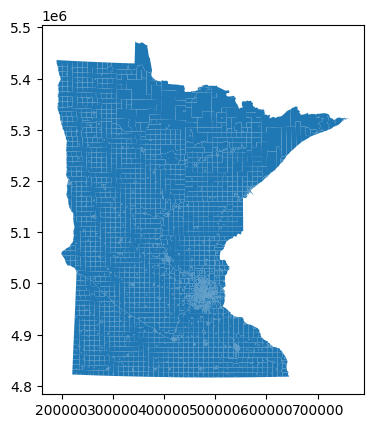

In [54]:
final_df.plot()

In [55]:
pop_vals = [final_df.loc[final_df["SEND"] == str(n).zfill(2), "TOTPOP"].sum() for n in range(1, 68)]
print(pop_vals)

[85175.0, 85390.0, 86171.0, 85002.0, 85402.0, 84634.0, 84730.0, 83738.0, 84812.0, 85819.0, 85150.0, 85224.0, 88671.0, 82224.0, 84886.0, 85295.0, 84826.0, 84857.0, 84872.0, 84757.0, 85312.0, 85405.0, 84988.0, 84304.0, 85508.0, 85003.0, 85723.0, 84944.0, 85680.0, 85658.0, 84976.0, 87510.0, 83661.0, 86124.0, 84138.0, 85827.0, 83985.0, 85426.0, 80944.0, 90123.0, 91415.0, 87242.0, 84972.0, 84174.0, 86581.0, 84634.0, 85722.0, 85627.0, 84705.0, 86548.0, 81770.0, 85131.0, 79274.0, 85890.0, 83051.0, 81067.0, 84727.0, 91757.0, 87543.0, 84503.0, 80557.0, 88288.0, 86130.0, 82383.0, 88966.0, 78940.0, 88023.0]


In [59]:
import matplotlib.pyplot as plt
from gerrychain import Graph, GeographicPartition, Partition, proposals, updaters, constraints, accept, MarkovChain, Election
from gerrychain.updaters import cut_edges, Tally
from gerrychain.proposals import recom, propose_random_flip
from gerrychain.accept import always_accept
from functools import partial
import time

import pandas as pd
import numpy as np
from collections import Counter

In [60]:
directory = "./MN"
if not os.path.exists(directory):
    os.makedirs(directory)
final_df.to_file("./MN/MN.shp")

In [61]:
mn_df = gpd.read_file("./MN/MN.shp")
mn_df = mn_df.fillna(0)
mn_graph = Graph.from_geodataframe(mn_df, adjacency="rook")

In [63]:
elections = [
    Election("G20PRED", {"Democratic": "G20PRED", "Republican": "G20PRER"}),
]

In [64]:
# return districts won by dems
def get_democratic_wins(partition):
    dem_wins = 0
    
    for district in partition.parts:
        dem_votes = sum(partition.graph.nodes[node]["G20PRED"] for node in partition.parts[district])
        rep_votes = sum(partition.graph.nodes[node]["G20PRER"] for node in partition.parts[district])
        
        if dem_votes > rep_votes:
            dem_wins += 1
            
    return dem_wins

In [65]:
my_updaters = {
    "cut_edges": cut_edges,
    "population": updaters.Tally("TOTPOP", alias="population"),
    "G20PRED": updaters.Tally("G20PRED"),
    "G20PRER": updaters.Tally("G20PRER"),
    "democratic_wins": get_democratic_wins
}

In [66]:
election_updaters = {election.name: election for election in elections}
my_updaters.update(election_updaters)

In [67]:
initial_partition = Partition(mn_graph, assignment="SEND", updaters=my_updaters)

In [68]:
ideal_population = sum(initial_partition["population"].values()) / len(initial_partition)

In [69]:
save_district_graph_mod=1
save_district_plot_mod=100

proposal = partial(recom,
                   pop_col="TOTPOP",
                   pop_target=ideal_population,
                   epsilon=0.10,
                   node_repeats=2
                  )
compactness_bound = constraints.UpperBound(
    lambda p: len(p["cut_edges"]),
    2*len(initial_partition["cut_edges"])
)

pop_constraint = constraints.within_percent_of_ideal_population(initial_partition, 0.18)

In [70]:
# run chain for steps and return data
def run_chain(steps):
    print("chain number of steps: ", steps)
    
    chain = MarkovChain(
        proposal=proposal,
        constraints=[pop_constraint, compactness_bound],
        accept=accept.always_accept,
        initial_state=initial_partition,
        total_steps=steps
    )
    
    cut_edges_count = []
    dem_wins_count = []
    dem_vote_percents = []
    
    for i, partition in enumerate(chain.with_progress_bar()):
        cut_edges_count.append(len(partition["cut_edges"]))
        dem_wins_count.append(partition["democratic_wins"])
        dem_vote_percents.append(sorted(partition["G20PRED"].percents("Democratic")))
    
    return cut_edges_count, dem_wins_count, dem_vote_percents

/opt/homebrew/anaconda3/envs/gerry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


chain number of steps:  100


100%|████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 116.94it/s]


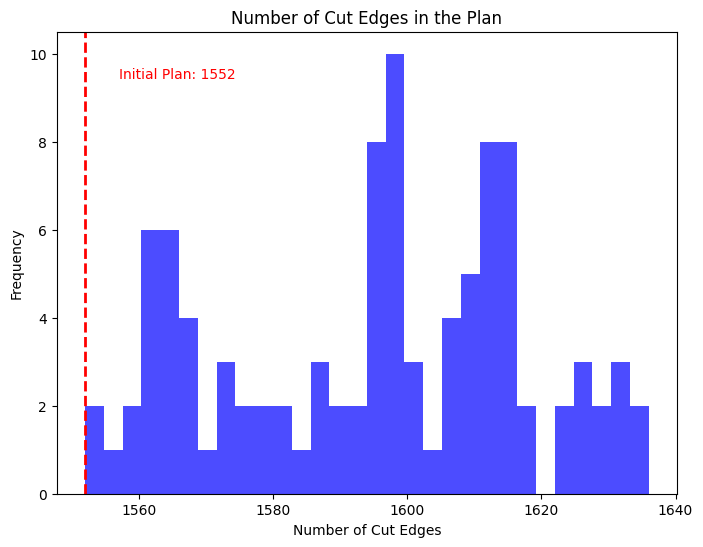

In [71]:
steps = 100
cut_edges_data, dem_wins_data, dem_vote_percent_data = run_chain(steps)

# Plot histogram for cut edges
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the histogram
ax.hist(cut_edges_data, bins=30, color='blue', alpha=0.7)

# Draw a vertical line for the initial plan's cut edges
initial_cut_edges = len(initial_partition["cut_edges"])
ax.axvline(initial_cut_edges, color="red", linestyle="--", linewidth=2)

# Add text annotation for the initial plan's cut edges
ax.text(initial_cut_edges + 5, ax.get_ylim()[1] * 0.9, 
        f"Initial Plan: {initial_cut_edges}", 
        color='red', fontsize=10)

# Annotate
ax.set_title("Number of Cut Edges in the Plan")
ax.set_xlabel("Number of Cut Edges")
ax.set_ylabel("Frequency")

# Save and show
plt.savefig('cut_edges_histogram.png')
plt.show()